

<H1>Методы интеллектуального анализа текстов</H1>
<H2>Тема 4. Морфологический анализ</H2>



### Задание 4:
Визуализировать на двумерном графике 100 word2vec-токенов (нужно указывать часть речи) из новостных текстов с помощью алгоритма t-SNE.

Импортируем нужные библиотеки.

In [184]:
import warnings
import re
import spacy
import glob
import gensim
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors

warnings.filterwarnings('ignore')

Из второй лабораторной работы используем датафрейм с текстами.

In [185]:
data = []
for path in glob.glob('./news_science/*'):
    texts = []
    for filename in tqdm(glob.glob(path + '/*.txt')):
        texts.append(open(filename, 'r').read().strip())

    data.append(pd.DataFrame({'text': texts}))
    data[-1]['genre'] = path.split('/')[-1][:3]  # 'new' или 'sci'

data = pd.concat(data)
data.sample(3)

100%|██████████| 79/79 [00:00<00:00, 1685.26it/s]


,text,genre
57,Компания Google заявила о своих планах преврат...,new
39,"Радикальная исламистская группировка ""Ансар ал...",new
22,"Никого не удивляет тот факт, что во время перв...",new


In [186]:
news = data.loc[data['genre'] == 'new'] # Получаем тексты только с тэгом "новости"

In [187]:
news = news.drop('genre', axis=1) # Чистим датафрейм от ненужной колонки с жанром

In [188]:
news = news.values.tolist() # Переводим датафрейм в список для удобства дальнейшей работы работы

In [189]:
# Объединяем все тексты в одну единую переменную
text = ''
for i in news:
    text += ' '.join(i)

In [190]:
text

'По всей видимости, протон-антипротонный коллайдер Теватрон, расположенный в Фермилаб в Чикаго будет закрыт в октябре 2011 года. Несмотря на то, что научные консультанты рекомендовали продлить его финансирование ещё на три года, Министерству энергетики США не удалось отыскать необходимые для этого средства.\nТеватрон обладает долгой и яркой историей. За 25 лет работы на нём было сделано немало больших открытий. Так, именно на Теватроне был впервые получен T-кварк — самая тяжёлая из известных фундаментальных частиц. На Теватроне была измерена асимметрия материи и антиматерии в процессах, в которых она никогда ранее не наблюдалась. На нём же были проведены самые точные на сегодняшний день измерения массы W-бозона, являющегося переносчиком слабого взаимодействия. \nСтроительство Теватрона было закончено в 1983 году, однако источник антипротонов был установлен только в 1985 году, а в 1986 году были произведены первые столкновения частиц. Своё название коллайдер получил от сокращения ТэВ — 

In [191]:
text = re.sub(r'[^а-яА-яa-zA-Z0-9 ]', '', text) # Удаляем все не нужные символы из текста

In [192]:
text

'По всей видимости протонантипротонный коллайдер Теватрон расположенный в Фермилаб в Чикаго будет закрыт в октябре 2011 года Несмотря на то что научные консультанты рекомендовали продлить его финансирование ещ на три года Министерству энергетики США не удалось отыскать необходимые для этого средстваТеватрон обладает долгой и яркой историей За 25 лет работы на нм было сделано немало больших открытий Так именно на Теватроне был впервые получен Tкварк  самая тяжлая из известных фундаментальных частиц На Теватроне была измерена асимметрия материи и антиматерии в процессах в которых она никогда ранее не наблюдалась На нм же были проведены самые точные на сегодняшний день измерения массы Wбозона являющегося переносчиком слабого взаимодействия Строительство Теватрона было закончено в 1983 году однако источник антипротонов был установлен только в 1985 году а в 1986 году были произведены первые столкновения частиц Сво название коллайдер получил от сокращения ТэВ  тераэлектронвольт триллион элек

Скачиваем статистическую модель: <code>http://vectors.nlpl.eu/repository/20/220.zip</code>

In [193]:
model = gensim.models.KeyedVectors.load_word2vec_format('220/model.bin', binary=True) # Переводим модель в word2vecc

In [194]:
model.key_to_index # Проверяем результат

{'xxxxxxxx_NUM': 0,
 'год_NOUN': 1,
 'xxxxxx_NUM': 2,
 'xxxxxxx_NUM': 3,
 'первый_ADJ': 4,
 'время_NOUN': 5,
 'человек_NOUN': 6,
 'introduction_PROPN': 7,
 'один_NUM': 8,
 'район_NOUN': 9,
 'мочь_VERB': 10,
 'стать_VERB': 11,
 'так_ADV': 12,
 'город_NOUN': 13,
 'другой_ADJ': 14,
 'область_NOUN': 15,
 'быть_VERB': 16,
 'новый_ADJ': 17,
 'два_NUM': 18,
 'перенаправление_NOUN': 19,
 'состав_NOUN': 20,
 'часть_NOUN': 21,
 'россия_PROPN': 22,
 'место_NOUN': 23,
 'также_ADV': 24,
 'являться_VERB': 25,
 'где_ADV': 26,
 'иметь_VERB': 27,
 'работа_NOUN': 28,
 'война_NOUN': 29,
 'самый_ADJ': 30,
 'уже_ADV': 31,
 'получить_VERB': 32,
 'второй_ADJ': 33,
 'день_NOUN': 34,
 'век_NOUN': 35,
 'еще_ADV': 36,
 'российский_ADJ': 37,
 'группа_NOUN': 38,
 'жизнь_NOUN': 39,
 'имя_NOUN': 40,
 'мир_NOUN': 41,
 'игра_NOUN': 42,
 'река_NOUN': 43,
 'более_ADV': 44,
 'сказать_VERB': 45,
 'русский_ADJ': 46,
 'говорить_VERB': 47,
 'находиться_VERB': 48,
 'советский_ADJ': 49,
 'государственный_ADJ': 50,
 'дело_NOUN'

In [195]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:
tokens = nltk.word_tokenize(text) # Токенизируем нашу переменную с текстом

In [197]:
# Приводим все токены к нижнему регистру
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [198]:
tokens

['по',
 'всей',
 'видимости',
 'протонантипротонный',
 'коллайдер',
 'теватрон',
 'расположенный',
 'в',
 'фермилаб',
 'в',
 'чикаго',
 'будет',
 'закрыт',
 'в',
 'октябре',
 '2011',
 'года',
 'несмотря',
 'на',
 'то',
 'что',
 'научные',
 'консультанты',
 'рекомендовали',
 'продлить',
 'его',
 'финансирование',
 'ещ',
 'на',
 'три',
 'года',
 'министерству',
 'энергетики',
 'сша',
 'не',
 'удалось',
 'отыскать',
 'необходимые',
 'для',
 'этого',
 'средстватеватрон',
 'обладает',
 'долгой',
 'и',
 'яркой',
 'историей',
 'за',
 '25',
 'лет',
 'работы',
 'на',
 'нм',
 'было',
 'сделано',
 'немало',
 'больших',
 'открытий',
 'так',
 'именно',
 'на',
 'теватроне',
 'был',
 'впервые',
 'получен',
 'tкварк',
 'самая',
 'тяжлая',
 'из',
 'известных',
 'фундаментальных',
 'частиц',
 'на',
 'теватроне',
 'была',
 'измерена',
 'асимметрия',
 'материи',
 'и',
 'антиматерии',
 'в',
 'процессах',
 'в',
 'которых',
 'она',
 'никогда',
 'ранее',
 'не',
 'наблюдалась',
 'на',
 'нм',
 'же',
 'были',
 '

Скачиваем языковую модель

In [199]:
! python3 -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 1.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [200]:
nlp = spacy.load('ru_core_news_md') # Загружаем NLP модель

In [201]:
document = nlp(text) # Создаем обработанный документ spaCy

In [202]:
# Получаем теги частей речи
for token in document:
    print(token.lemma_, token.pos_, token.dep_)

по ADP case
весь DET det
видимость NOUN obl
протонантипротонный VERB amod
коллайдер NOUN nsubj
теватрон PROPN appos
расположенный ADJ nsubj:pass
в ADP case
фермилаб PROPN obl
в ADP case
чикаго PROPN obl
будет AUX aux:pass
закрыть VERB ROOT
в ADP case
октябрь NOUN obl
2011 ADJ amod
год NOUN nmod
несмотря ADV case
на ADP fixed
то PRON obl
что SCONJ mark
научный ADJ amod
консультант NOUN nsubj
рекомендовать VERB acl
продлить VERB xcomp
его DET det
финансирование NOUN obj
ещ NOUN nmod
на ADP case
три NUM nummod:gov
год NOUN obl
министерство PROPN iobj
энергетика NOUN nmod
сша PROPN nmod
не PART advmod
удаться VERB conj
отыскать VERB csubj
необходимый ADJ amod
для ADP case
это PRON obl
средстватеватрон PROPN nsubj
обладать VERB conj
долгий ADJ amod
и CCONJ cc
яркий ADJ conj
история NOUN obj
за ADP case
25 NUM nummod
год NOUN obl
работа NOUN nmod
на ADP case
нм PROPN nmod
было AUX aux:pass
сделать VERB conj
немало ADV nsubj:pass
больший ADJ amod
открытие NOUN obl
так ADV advmod
именно PART f

In [203]:
stopwords = set(stopwords.words('russian')) # Загружаем стоп-слова

In [204]:
doc_tokens = []
doc_types = []
# Чистим тэги от стоп-слов, а так же от ненужных тэгов
# Так же готовим список для дальнейшей корректной визуализации
for token in document:
    if token.lemma_ not in stopwords:
        if token.pos_ != 'NUM' and token.pos_ != 'SPACE':
            doc_tokens.append(token.lemma_ + '_' + token.pos_)
            doc_types.append(token.pos_)



In [205]:
doc_tokens

['весь_DET',
 'видимость_NOUN',
 'протонантипротонный_VERB',
 'коллайдер_NOUN',
 'теватрон_PROPN',
 'расположенный_ADJ',
 'фермилаб_PROPN',
 'чикаго_PROPN',
 'закрыть_VERB',
 'октябрь_NOUN',
 '2011_ADJ',
 'год_NOUN',
 'несмотря_ADV',
 'научный_ADJ',
 'консультант_NOUN',
 'рекомендовать_VERB',
 'продлить_VERB',
 'финансирование_NOUN',
 'ещ_NOUN',
 'год_NOUN',
 'министерство_PROPN',
 'энергетика_NOUN',
 'сша_PROPN',
 'удаться_VERB',
 'отыскать_VERB',
 'необходимый_ADJ',
 'это_PRON',
 'средстватеватрон_PROPN',
 'обладать_VERB',
 'долгий_ADJ',
 'яркий_ADJ',
 'история_NOUN',
 'год_NOUN',
 'работа_NOUN',
 'нм_PROPN',
 'сделать_VERB',
 'немало_ADV',
 'больший_ADJ',
 'открытие_NOUN',
 'именно_PART',
 'теватрон_PROPN',
 'впервые_ADV',
 'получить_VERB',
 'tкварк_PROPN',
 'самая_ADJ',
 'тяжлая_ADJ',
 'известный_ADJ',
 'фундаментальный_ADJ',
 'частица_NOUN',
 'теватрон_PROPN',
 'измерить_VERB',
 'асимметрия_NOUN',
 'материя_NOUN',
 'антиматерия_NOUN',
 'процесс_NOUN',
 'которых_PRON',
 'ранее_ADV'

In [206]:
# Создаем словарь с тэгами и их количеством в тексте
doc_dict = {}
for i in doc_tokens:
    if i not in doc_dict:
        doc_dict[i] = doc_tokens.count(i)

In [207]:
doc_dict

{'весь_DET': 152,
 'видимость_NOUN': 3,
 'протонантипротонный_VERB': 1,
 'коллайдер_NOUN': 4,
 'теватрон_PROPN': 6,
 'расположенный_ADJ': 3,
 'фермилаб_PROPN': 1,
 'чикаго_PROPN': 1,
 'закрыть_VERB': 5,
 'октябрь_NOUN': 6,
 '2011_ADJ': 4,
 'год_NOUN': 382,
 'несмотря_ADV': 35,
 'научный_ADJ': 16,
 'консультант_NOUN': 1,
 'рекомендовать_VERB': 4,
 'продлить_VERB': 3,
 'финансирование_NOUN': 5,
 'ещ_NOUN': 8,
 'министерство_PROPN': 3,
 'энергетика_NOUN': 6,
 'сша_PROPN': 79,
 'удаться_VERB': 10,
 'отыскать_VERB': 1,
 'необходимый_ADJ': 36,
 'это_PRON': 262,
 'средстватеватрон_PROPN': 1,
 'обладать_VERB': 8,
 'долгий_ADJ': 8,
 'яркий_ADJ': 6,
 'история_NOUN': 18,
 'работа_NOUN': 38,
 'нм_PROPN': 4,
 'сделать_VERB': 46,
 'немало_ADV': 1,
 'больший_ADJ': 45,
 'открытие_NOUN': 6,
 'именно_PART': 29,
 'впервые_ADV': 12,
 'получить_VERB': 48,
 'tкварк_PROPN': 1,
 'самая_ADJ': 6,
 'тяжлая_ADJ': 1,
 'известный_ADJ': 54,
 'фундаментальный_ADJ': 6,
 'частица_NOUN': 19,
 'измерить_VERB': 2,
 'асимм

In [208]:
doc_dict = dict(sorted(doc_dict.items(), key=lambda item: item[1], reverse=True)) # Сортируем словарь от большего к меньшему

In [209]:
doc_dict

{'год_NOUN': 382,
 'это_PRON': 262,
 'мочь_VERB': 201,
 'свой_DET': 173,
 'весь_DET': 152,
 'страна_NOUN': 145,
 'время_NOUN': 132,
 'россия_PROPN': 129,
 'человек_NOUN': 124,
 'стать_VERB': 107,
 'также_ADV': 105,
 'кольцо_NOUN': 99,
 'новый_ADJ': 94,
 'которые_PRON': 86,
 'должный_ADJ': 85,
 'однако_ADV': 84,
 'сша_PROPN': 79,
 'система_NOUN': 75,
 'являться_VERB': 74,
 'власть_NOUN': 72,
 'первый_ADJ': 71,
 'российский_ADJ': 70,
 'политический_ADJ': 69,
 'президент_NOUN': 69,
 'проблема_NOUN': 64,
 'иметь_VERB': 63,
 'изменение_NOUN': 63,
 'решение_NOUN': 62,
 'вопрос_NOUN': 61,
 'право_NOUN': 60,
 'доллар_NOUN': 59,
 'правительство_NOUN': 59,
 'последний_ADJ': 58,
 'мир_NOUN': 58,
 'день_NOUN': 56,
 'некоторый_DET': 56,
 'отношение_NOUN': 55,
 'известный_ADJ': 54,
 'дело_NOUN': 54,
 'случай_NOUN': 53,
 'сторона_NOUN': 52,
 'хамас_PROPN': 51,
 'рынок_NOUN': 50,
 'действие_NOUN': 50,
 'получить_VERB': 48,
 'например_ADV': 47,
 'кризис_NOUN': 47,
 'международный_ADJ': 47,
 'сделать_VE

In [210]:
vectors = []
total = 0
counter = 0
# Применяем нашу NLP модель к нашему тексту
while total < 100:
    if list(doc_dict.keys())[counter] in model.key_to_index:
        vectors.append(model[list(doc_dict.keys())[counter]])
        total += 1
    counter += 1

In [211]:
vectors = np.array(vectors) # Переводим наши векторы к массиву для дальнейшей работы TSNE

In [212]:
vectors_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(vectors)

In [213]:
vectors_embedded

array([[ 4.3739142 ,  1.0808364 ],
       [-3.1876085 ,  2.404712  ],
       [ 0.84585994, -2.432179  ],
       [-1.4818764 ,  1.7523606 ],
       [ 1.2256279 , -1.7367672 ],
       [-1.7228398 ,  4.1738877 ],
       [ 1.7937651 ,  3.280863  ],
       [-0.78000313,  1.5860316 ],
       [-0.5813122 ,  0.80445236],
       [ 0.2437864 ,  1.878338  ],
       [-0.2773047 ,  1.6713645 ],
       [-1.4109311 ,  1.8108487 ],
       [ 0.45232007, -0.6562544 ],
       [-3.4258726 ,  1.1138816 ],
       [ 1.4700646 ,  4.4198227 ],
       [ 0.69389135, -3.8347814 ],
       [ 1.0036098 ,  1.7661054 ],
       [ 1.6388917 , -1.9627726 ],
       [-0.5082061 , -2.6971533 ],
       [ 2.4049692 , -0.03896512],
       [-4.3815074 , -1.0988088 ],
       [ 1.7778449 ,  4.614565  ],
       [-2.525337  ,  3.0944276 ],
       [-2.2585516 ,  0.7684023 ],
       [-4.4605913 , -1.1054463 ],
       [-5.1660457 ,  2.5038228 ],
       [-2.9557095 ,  5.7582297 ],
       [ 0.7184112 , -3.762626  ],
       [ 0.59550935,

In [221]:
# Распределяем координаты на отдельные массивы
x_s = [vectors_embedded[x][0] for x in range(len(vectors_embedded))]
y_s = [vectors_embedded[y][1] for y in range(len(vectors_embedded))]

In [215]:
hundred = list(doc_dict)[:100] # Отсекаем нужную сотню для корректной визуализации

In [216]:
doc_types = set(doc_types) # С помощью набора убираем дубликаты из сотни

In [217]:
doc_types

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'NOUN',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'VERB',
 'X'}

In [218]:
colours = {}
# Подключаем цвета из диапазона CSS4, добавляем их в список и перемешиваем. Затем добавляем в словарь для визуализации
col_list = list(mcolors.CSS4_COLORS)
np.random.shuffle(col_list)
for i in range(len(doc_types)):
    colours[list(doc_types)[i]] = col_list[i]

In [219]:
colours

{'PART': 'chartreuse',
 'VERB': 'palevioletred',
 'PROPN': 'navy',
 'PRON': 'crimson',
 'X': 'linen',
 'AUX': 'peachpuff',
 'NOUN': 'mediumvioletred',
 'CCONJ': 'gold',
 'ADJ': 'lightcoral',
 'PUNCT': 'paleturquoise',
 'ADP': 'violet',
 'ADV': 'lavenderblush',
 'SCONJ': 'lightcyan',
 'DET': 'mintcream'}

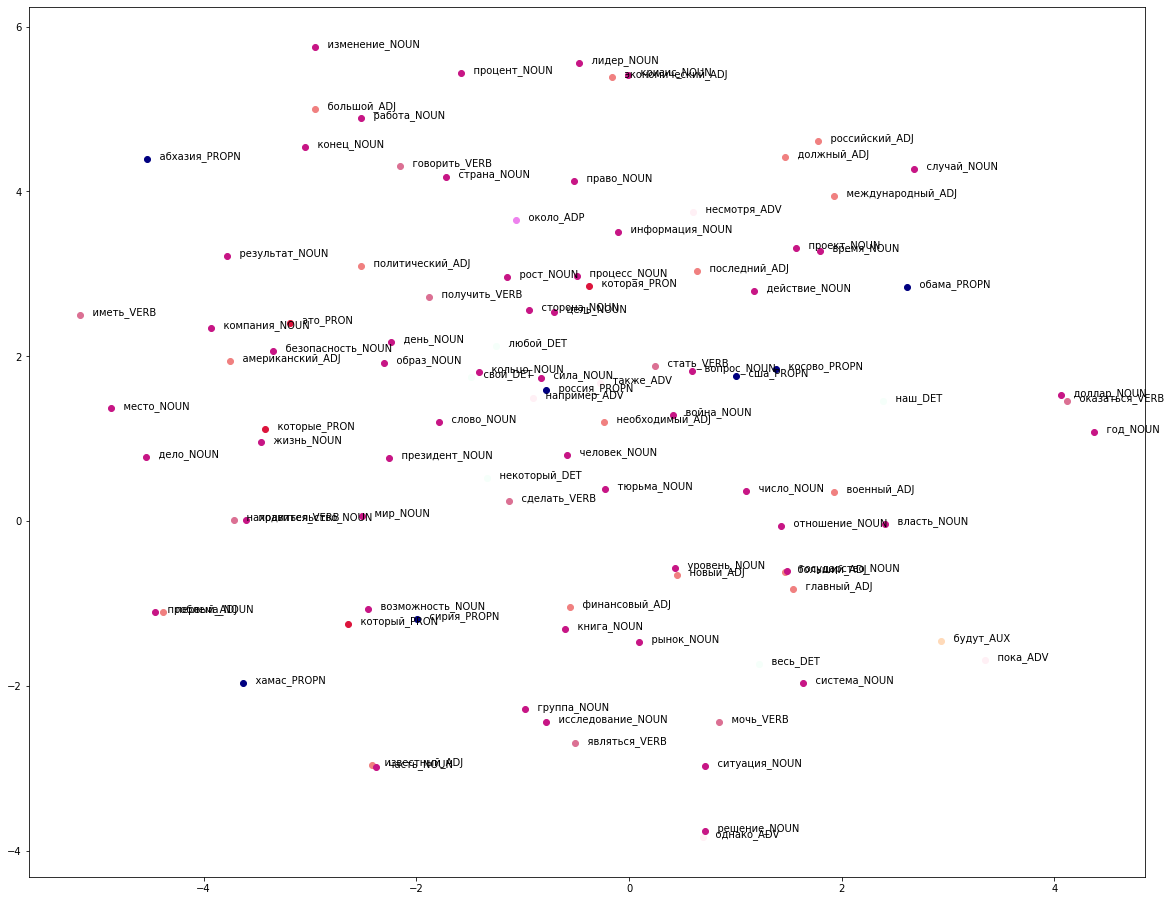

In [220]:
x = x_s    #  x - координаты точек
y = y_s    #  y - координаты точек

fig, ax = plt.subplots(figsize = (20, 16))


color_list = list(mcolors.CSS4_COLORS)

for i, txt in enumerate(hundred):
    ax.annotate('    ' + txt, (x_s[i], y_s[i]))
    check = txt.split('_')
    check = check[-1]
    ax.scatter(x_s[i], y_s[i], c = colours[check])




plt.show()